<h1 align=center>Fall 2015: An intro to <a href="http://cs.mcgill.ca/~jpineau/comp598/">Applied Machine Learning</a> in Python</h1>
<h2 align=center>Pierre-Luc Bacon</h2>

# How to Python at McGill

Python is great because it has so many packages. However, you will quickly discover that installing packages without administrative privileges can become challenging. There is [virtualenv](http://www.virtualenv.org/en/latest/) that lets you install packages locally but it can be a nightmare when you have C librairies to build. 

If you want to do scientific computing with Python, I advise you to go with the [Anaconda](http://continuum.io/downloads) Python distribution. It will save you (and the SOCS sysadmins) a great deal of time. To install Anaconda on Linux for 64 bits machines, it would look like:

In [1]:
%%bash
wget http://repo.continuum.io/archive/Anaconda3-2.3.0-Linux-x86_64.sh
chmod +x Anaconda3-2.3.0-Linux-x86_64.sh
./Anaconda3-2.3.0-Linux-x86_64.sh
conda update conda
conda update ipython

Process is terminated.


IPython notebook can then be started from the command line with `ipython notebook` in a directory where you want to store your notebooks.

# The magic of IPython

If you miss the interactive style of the Matlab prompt, it's a good idea to use the [IPython](http://ipython.org/) shell or the web-based [IPython notebook](http://ipython.org/notebook.html). Notebooks embody the idea of [literate programming](http://en.wikipedia.org/wiki/Literate_programming) interleaving text, math rendering, executable code, plots and other forms of medias. It's also a great way to embrace reproducibility ! Download this notebook and see for yourself.  

Although IPython has the *python* suffix in its name, its modular design allows for a great deal of interoperability with other languages. For example, you can call bash through the so-called *cell magics*. For example:

In [1]:
%pwd

'/home/pierre-luc/workspace/notebooks'

In order to capture the output of a bash cell into Python variables, you could also do:

In [2]:
%%bash --out output --err error
echo $RANDOM

In [3]:
print(output)

18233



Another useful cell magic is also `%timeit`, giving you an estimate of the time spent executing a given function. For example:

In [4]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%timeit np.linalg.eigvals(np.random.rand(50,50))

The slowest run took 4.57 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 1.52 ms per loop


You can learn more about various cell magics in this [notebook](http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb)

# Numpy basics

Numpy is a Python library which provides matrix manipulation capabilities and other standard numerical algorithms. 

Numpy and smart vectorization is the key to fast scientific computing in Python. In fact, it's the only advice that I strongly recommend following:

<span style="color:red">Avoid for loops at all cost !</span>

Aside from that, the nice thing about learning Python is that ... you don't need to learn Python. 

## Creating arrays

You can create a vector from an existing tuple:

In [6]:
x = np.array([1,2,3,4])
print(x)
print(x.shape)

[1 2 3 4]
(4,)


Similarly, you can define a numpy matrix as:


In [7]:
X = np.array([[1,2], [3,4]])
print(X)
print(X.shape)

[[1 2]
 [3 4]]
(2, 2)


You can also easily generate points on an interval through [linspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) or [logspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html):

In [8]:
x = np.linspace(0, 10, 25)
print(x)

[  0.           0.41666667   0.83333333   1.25         1.66666667
   2.08333333   2.5          2.91666667   3.33333333   3.75         4.16666667
   4.58333333   5.           5.41666667   5.83333333   6.25         6.66666667
   7.08333333   7.5          7.91666667   8.33333333   8.75         9.16666667
   9.58333333  10.        ]


The standards matrices can be generated with:

In [9]:
np.zeros((5,5))

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [10]:
np.ones((5,5))

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [11]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## Indexing

As opposed to Matlab, Numpy is 0-indexed. Indexing can be performed efficiently through *slicing*.

In [12]:
X = np.random.randn(4,4)
print(X)

[[-0.84362718 -0.04965228 -0.16150825  0.30659702]
 [-0.87102336 -0.68983042  0.87843826 -1.79163592]
 [-2.22599409  0.21870701  0.57963301  0.5135895 ]
 [-0.09623983  0.50049305  0.34593398 -0.67961077]]


Selecting all rows except the first and select all columns:

In [13]:
X[1:,:]

array([[-0.87102336, -0.68983042,  0.87843826, -1.79163592],
       [-2.22599409,  0.21870701,  0.57963301,  0.5135895 ],
       [-0.09623983,  0.50049305,  0.34593398, -0.67961077]])

Select columns 2 and 0 and all rows:

In [14]:
X[:,[2,0]]

array([[-0.16150825, -0.84362718],
       [ 0.87843826, -0.87102336],
       [ 0.57963301, -2.22599409],
       [ 0.34593398, -0.09623983]])

`-1` (minus one) stands for the last element in a given dimension

In [15]:
X[-1,:]

array([-0.09623983,  0.50049305,  0.34593398, -0.67961077])

A powerful indexing feature can also be achieved through *logical indexing*. You can create a boolean array from an ndarray:

In [16]:
X < 0.5

array([[ True,  True,  True,  True],
       [ True,  True, False,  True],
       [ True,  True, False, False],
       [ True, False,  True,  True]], dtype=bool)

The boolean ndarray can then be used for indexing:

In [17]:
X[X < 0.5]

array([-0.84362718, -0.04965228, -0.16150825,  0.30659702, -0.87102336,
       -0.68983042, -1.79163592, -2.22599409,  0.21870701, -0.09623983,
        0.34593398, -0.67961077])

# Avoiding for-loops: broadcasting

Thinking about for-loops or Matlab's [repmat](http://www.mathworks.com/help/matlab/ref/repmat.html) ? The chances are that you can avoid all of that and leverage the powerful concept of [broadcasting](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) in Numpy. 

Broadcasting allows you to essentially mimic the process of copying or repeating a given array object to match the dimensions of a larger array. Some magics is implemented under the hood (within [Blas](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms)) which makes broadcasting operations both cpu and memory efficient.

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png"/>

(Figure taken from [AstroML](http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html))

The simplest form of broadcasting might be seen in the matrix or vector-scalar operation of addition:

In [18]:
np.arange(4) + 0.5

array([ 0.5,  1.5,  2.5,  3.5])

Which is just equivalent to:

In [19]:
np.arange(4) + np.array([0.5, 0.5, 0.5, 0.5])

array([ 0.5,  1.5,  2.5,  3.5])

but without the memory overhead. We can also broadcast higher order arrays onto each other. For example, a vector-matrix broadcasting on the columns:


In [20]:
A = np.arange(6).reshape(3,2)

In [21]:
b = np.arange(3)
A + b[:, np.newaxis]

array([[0, 1],
       [3, 4],
       [6, 7]])

Which you have otherwise implemented as an in-place for-loop:

In [22]:
for j in range(A.shape[1]):
    A[:,j] += b
print(A)

[[0 1]
 [3 4]
 [6 7]]


## Numpy for Matlab users

If you know Matlab already, make sure to look at the cheatsheet [Numpy for matlab users](http://mathesaurus.sourceforge.net/matlab-numpy.html).

## Numpy I/O


You can import and export data from a variety of formats. For example, you can save a numpy array to a text format using [np.savetxt](http://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html).

In [23]:
X = np.random.normal(size=(5,5))
np.savetxt('data.txt', X)

In [24]:
%cat data.txt

-4.728793822042743344e-01 -3.613048228703349407e-01 6.966928973211405918e-01 -8.900603566317988324e-01 -5.645418756729717602e-01
9.610820182502521902e-01 2.997615639034699964e+00 8.087493362291775512e-01 -7.848807391386428689e-01 -1.969883850157649330e-01
2.996609608965298488e+00 4.703976588121833724e-01 -1.265946039486756325e+00 -2.656480317399875224e-01 4.934733572735182094e-01
1.887504063570792256e+00 7.315339164790833903e-01 2.773833137054100284e-01 1.887246818245387869e+00 -1.753328228948649148e+00
7.902569898371405444e-01 -6.042279384270987652e-01 -1.523425370353121089e+00 -5.949557874254044476e-01 -3.639632274990651367e-02


In [25]:
X = np.loadtxt('data.txt')

Unless you want your data files to be human readable in text form, it is usually preferable to use [http://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html](http://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html) rather than `np.savetxt`. The array will then be saved in a more compact Numpy (`.npy`) format.

## Dealing with matfiles

If you can export Matlab matrices in versions v4 (Level 1.0), v6 or v7 to 7.2, then you would be able to use [scipy.io.loadmat](http://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html) to load your data in numpy.

In [26]:
from scipy.io import loadmat, savemat
savemat('test.mat', {'X': X})

In [27]:
print(loadmat('test.mat'))

{'__version__': '1.0', '__globals__': [], 'X': array([[-0.47287938, -0.36130482,  0.6966929 , -0.89006036, -0.56454188],
       [ 0.96108202,  2.99761564,  0.80874934, -0.78488074, -0.19698839],
       [ 2.99660961,  0.47039766, -1.26594604, -0.26564803,  0.49347336],
       [ 1.88750406,  0.73153392,  0.27738331,  1.88724682, -1.75332823],
       [ 0.79025699, -0.60422794, -1.52342537, -0.59495579, -0.03639632]]), '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Sep 29 13:05:22 2015'}


# Sampling

You implemented a generative model. You want to use [EM](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) or [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo). How do you sample ? 

You first have a look at: 

In [28]:
from IPython.display import IFrame
IFrame('http://docs.scipy.org/doc/numpy/reference/routines.random.html', width=700, height=700)

## Sampling categorical data with a specified CDF

One option is to use [numpy.random.choice](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html#numpy.random.choice) with the `p` argument:

In [29]:
probs = [0.75, 0.05, 0.2]
samples = np.random.choice([0,1,2], size=1000, p=probs)
np.sum(samples == 0)

768

Or to implement the [inverse sampling method](https://en.wikipedia.org/wiki/Inverse_transform_sampling) yourself:

In [30]:
samples = np.argmax(np.greater(np.cumsum(probs), np.random.rand(1000)[:, np.newaxis]), axis=1) 
np.sum(samples == 0)

756

# Reproducibility with randomness

In order to get reproducible results with probabilistic algorithms, it is often useful to fix the [random seed](https://en.wikipedia.org/wiki/Random_seed) for the pseudo-random number generator. 

In Numpy, you construct a [`numpy.random.RandomState`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.RandomState.html) object with a fixed seed value. If the argument is `None`, the seed is taken from `/dev/urandom/` you get no reproducibility. 


In [31]:
rng = np.random.RandomState(seed=1234)
np.sum(rng.choice([0,1,2], size=1000, p=probs) == 0.)

733

# Scikit-learn

Scikit-learn offers a variety of classification, regression and clustering algorithms under a unified interface. If you decided to install Anaconda, it should already be available. [Standard datasets](http://scikit-learn.org/stable/datasets/) are shipped with Scikit. They can be quite useful for debugging your algorithm. We will load the *iris* dataset with:

In [32]:
from sklearn import linear_model, datasets

iris = datasets.load_iris()
X = iris.data[:,:]
Y = iris.target

Scikit-learn provides different [cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html) techniques. In the following `StratifiedKFold` is an iterator which outputs pairs of indices for the train and test instances. You then use these indices to slice your dataset. 

In [33]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import mean_squared_error

skf = StratifiedKFold(Y, 3)
logreg = linear_model.LogisticRegression(C=1e5)

for train, test in skf:
    ypred = logreg.fit(X[train], Y[train]).predict(X[test])
    print(mean_squared_error(Y[test], ypred))

0.0196078431373
0.117647058824
0.0


The above loop can also be written more succinctly using [cross_val_score](http://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics). By specifying `n_jobs=k`, you can compute the cross-validation loop in parallel in `k` processes. If `k=-1`, all CPUs are used.

In [34]:
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, Y, cv=skf, scoring='mean_squared_error', n_jobs=-1)

array([-0.01960784, -0.11764706, -0.        ])

## Model selection

Using cross-validated scores, you can perform model selection efficiently through [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV). In the following, we will load the digits dataset and perform grid search over the parameters of an SVM classifier.

In [35]:
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

digits = datasets.load_digits()
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

`GridSearchCV` takes an estimator (regression, classification or clustering), a dictionary of parameters to try for that particular estimator, a cross-validation iterator and a scoring function. Once again, the parameter search can be performed in parallel with `n_jobs=-1`. The `fit` function of `GridSearchCV` then scores every possible combination of the `tuned_parameters` and saves the best one in the `best_estimator_` attribute.

In [36]:
skf = StratifiedKFold(Y, 5)
clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=skf, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print("Grid scores on train set:")
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"%(mean_score, scores.std() / 2, params))

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)
Grid scores on train set:
0.933 (+/-0.018) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.767 (+/-0.018) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.933 (+/-0.018) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.940 (+/-0.012) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.933 (+/-0.018) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.940 (+/-0.012) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.933 (+/-0.018) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.940 (+/-0.012) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.940 (+/-0.012) for {'kernel': 'linear', 'C': 1}
0.940 (+/-0.012) for {'kernel': 'linear', 'C': 10}
0.940 (+/-0.012) for {'kernel': 'linear', 'C': 100}
0.940 (+/-0.012) for {'kernel': 'linear', 'C': 1000}


The classification performance of the best estimator can then be reported with [classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report).

In [37]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        89
          1       0.96      1.00      0.98        90
          2       1.00      0.99      0.99        92
          3       0.99      0.99      0.99        93
          4       1.00      1.00      1.00        76
          5       0.97      0.97      0.97       108
          6       0.99      0.99      0.99        89
          7       0.99      1.00      0.99        78
          8       0.99      0.96      0.97        92
          9       0.99      0.98      0.98        92

avg / total       0.99      0.99      0.99       899



## Dealing with large parameter sets

It might happen that the set of parameters over which you would hope to run `GridSearchCV` would be too large. We could then decide to put a prior or the parameters and perform a stochastic search. [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.RandomizedSearchCV.html#sklearn.grid_search.RandomizedSearchCV) supports any of the standard distribution from [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) as priors. In this example, we will set an exponential priors over the `C` and `gamma` parameters.

In [38]:
import scipy.stats
from sklearn.grid_search import RandomizedSearchCV

tuned_parameters = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':['auto', None]}

clf = RandomizedSearchCV(SVC(C=1), tuned_parameters, n_iter=10, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

SVC(C=80.76424494995923, cache_size=200, class_weight=None, coef0=0.0,
  degree=3, gamma=0.0035460550578710255, kernel='rbf', max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        89
          1       0.99      1.00      0.99        90
          2       1.00      0.98      0.99        92
          3       0.99      0.98      0.98        93
          4       0.99      1.00      0.99        76
          5       0.99      0.97      0.98       108
          6       1.00      0.98      0.99        89
          7       0.99      0.99      0.99        78
          8       0.94      0.97      0.95        92
          9       0.97      0.99      0.98        92

avg / total       0.98      0.98      0.98       899



## Fancier model selection

[Hyperopt](https://github.com/hyperopt/hyperopt) goes beyond the randomized and grid search methods and provides fancier *hyperparameters* optimization. This package is quite popular in the neural net communities. 

It has also been *sklearnified* under [hyperopt-sklearn](https://github.com/hyperopt/hyperopt-sklearn).

# Plotting the confusion matrix

The confusion matrix is a useful visual tool to asess the classification performance. In the ideal case, you would see only entries on the diagonal. In this case, every label would have been predicted perfectly.

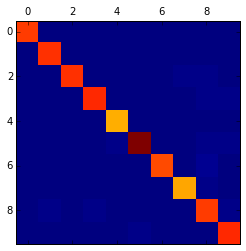

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.matshow(cm)

# Generating an ROC curve

Wee can compute the Receiver Operating Characteristic (ROC) curve to assess the quality of a binary classifier. In the following, we will use a synthetic binary classification task from the Hastie textbook. It consists of 12000 instances, each with 10 Gaussian features. We will make use of the probabilistic interpretation of logistic regression in order to produce the ROC curve. 

In [40]:
from sklearn.datasets import make_hastie_10_2 
from sklearn.linear_model import LogisticRegression

X, y = make_hastie_10_2()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

tuned_parameters = [{'penalty': ['l1', 'l2'],
                     'C': [1, 10, 100, 1000]}]

logreg = LogisticRegression()
clf = GridSearchCV(logreg, tuned_parameters)
clf.fit(X_train, y_train)
clf.best_score_

0.50649999999999995

The [roc_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) function takes as inputs the true labels for the binary classification as well as the probability estimate of the dominant class. We use `np.max` with `axis=1` to compute the max across the columns (the second axis).

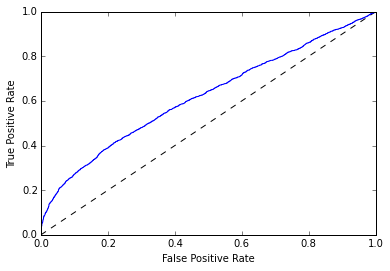

In [41]:
from sklearn.metrics import roc_curve
y_pred = clf.predict_proba(X_test)
y_score = np.max(y_pred, axis=1)
fpr, tpr, th = roc_curve(y_test, y_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr)

This is a pretty bad ROC curve.

# Plotting the learning curve 

[sklearn.learning_curve.learning_curve](http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html#sklearn.learning_curve) is another one-liner which might be useful for illustrating the learning behavior of a given a model (for a fixed choice of parameters). Building upon our last example, we will plot the learning curve of the best model that we found through grid search. 

In [42]:
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import ShuffleSplit

cv = ShuffleSplit(digits.data.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)

train_sizes, train_scores, test_scores = learning_curve(clf.best_estimator_, X, y, cv=cv,
                                                        train_sizes=np.linspace(.1, 1.0, 5))

We can use the [fill_between](http://matplotlib.org/examples/pylab_examples/fill_between_demo.html) plotting function of Matplotlib to show the standard deviation in the score estimates. 

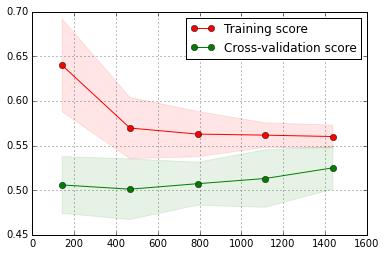

In [43]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

# One-hot encoding of categorical features

Scikit-learn also offers convenient preprocessing functions for the most common cases. Let say that you have categorial data of the following kind:

In [44]:
measurements = [
     {'month': 'January', 'temperature': 33.},
     {'month': 'March', 'temperature': 12.},
     {'month': 'May', 'temperature': 18.},
     {'month': 'January', 'temperature': 12.},
 ]

[DictVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html#loading-features-from-dicts) can be used to transform lists of dictionaries. Categorial variables are transformed using one-hot encoding. 

In [45]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
vec.fit_transform(measurements).toarray()

array([[  1.,   0.,   0.,  33.],
       [  0.,   1.,   0.,  12.],
       [  0.,   0.,   1.,  18.],
       [  1.,   0.,   0.,  12.]])

# Counting word frequencies

When working with text data, you often have to estimate empirical probabilities. [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) allows you to write a one-liner for this task. We will use the [20 Newsgroup](http://qwone.com/~jason/20Newsgroups/) dataset to illustate this usecase. 

In [46]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(twenty_train.data)
vectorizer.vocabulary_.get(u'algorithm')

27366

By default, `CountVectorizer` only extracts frequencies for single tokens. When looking at pair or triples of tokens, we then talk about n-grams models. `CountVectorizer` takes a `ngram_range` argument specifying the minimum and maximum order of the n-grams to extract. 

The scikit-learn documentation has a [dedicated page](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) on text data. Make sure to take a look !

Oh, and here's a fun exercise ! Using `CountVectorizer`, estimate the empirical probabilies of some text corpus and sample sequences of words starting from an initial word. This would give you a primitive Markov Chain approach to text generation.

# Learning more

* [NLTK](http://www.nltk.org/) for more advanced Natural Language Processing (NLP) tools in Python
* [statsmodels](http://statsmodels.sourceforge.net/) for autoregressive models
* [Pandas](http://pandas.pydata.org/) for data gymnastics on structured datasets
* [matplotlib](http://matplotlib.org/gallery.html) to learn how to generate fancy plots
* [networkx](https://networkx.github.io/) for representing and operating on graphs
* [Starcluster, Statsmodels and Pandas](http://nbviewer.ipython.org/github/pierrelux/notebooks/blob/master/Starcluster%20and%20IPython%20tutorial.ipynb) another tutorial that I wrote on using Starcluster on Amazon EC2 in combination with statsmodels and Pandas
* [Diving into Open Data with IPython Notebook & Pandas](http://nbviewer.ipython.org/github/jvns/talks/blob/master/pyconca2013/pistes-cyclables.ipynb) on using Pandas on the Bixi dataset. (Btw, Julia is a former student of Prakash).
* [How to convert notebooks to Latex](http://ipython.org/ipython-doc/1/interactive/nbconvert.html) A great way to submit your assignments !